In [1]:
using Flight.FlightCore.Systems
using Flight.FlightCore.Plotting

using Flight.FlightPhysics.Geodesy
using Flight.FlightPhysics.Kinematics

using Flight.FlightComponents.Aircraft

using Flight.FlightAircraft.C172R

using ControlSystems

In [2]:
ac = Cessna172Rv0(NED()) |> System #linearization requires NED kinematics
ac.u.airframe.pld.m_pilot = 75
ac.u.airframe.pld.m_copilot = 75
ac.u.airframe.pld.m_lpass = 0
ac.u.airframe.pld.m_rpass = 0
ac.u.airframe.pld.m_baggage = 0

trim_params = C172Rv0.TrimParameters(
    loc = LatLon(),
    h = HOrth(1000),
    ψ_nb = 0.0,
    TAS = 40.0,
    γ_wOb_n = 0.0,
    ψ_lb_dot = 0.00,
    θ_lb_dot = 0.0,
    β_a = 0.0,
    fuel = 1,
    mixture = 0.5,
    flaps = 0.0)

lm = Aircraft.linearize!(ac; trim_params)

Flight.FlightComponents.Control.LinearStateSpace{16, 4, 17, ComponentArrays.ComponentVector{Float64, Vector{Float64}, Tuple{ComponentArrays.Axis{(ψ = 1, θ = 2, φ = 3, ϕ = 4, λ = 5, h = 6, p = 7, q = 8, r = 9, v_x = 10, v_y = 11, v_z = 12, α_filt = 13, β_filt = 14, ω_eng = 15, fuel = 16)}}}, ComponentArrays.ComponentVector{Float64, Vector{Float64}, Tuple{ComponentArrays.Axis{(throttle = 1, aileron = 2, elevator = 3, rudder = 4)}}}, ComponentArrays.ComponentVector{Float64, Vector{Float64}, Tuple{ComponentArrays.Axis{(ψ = 1, θ = 2, φ = 3, ϕ = 4, λ = 5, h = 6, p = 7, q = 8, r = 9, TAS = 10, α = 11, β = 12, f_x = 13, f_y = 14, f_z = 15, ω_eng = 16, m_fuel = 17)}}}, ComponentArrays.ComponentMatrix{Float64, Matrix{Float64}, Tuple{ComponentArrays.Axis{(ψ = 1, θ = 2, φ = 3, ϕ = 4, λ = 5, h = 6, p = 7, q = 8, r = 9, v_x = 10, v_y = 11, v_z = 12, α_filt = 13, β_filt = 14, ω_eng = 15, fuel = 16)}, ComponentArrays.Axis{(ψ = 1, θ = 2, φ = 3, ϕ = 4, λ = 5, h = 6, p = 7, q = 8, r = 9, v_x = 10, v_y = 

## Lateral Dynamics

In [107]:
lat_dyn = filter(lm;
    u = (:aileron, :rudder),
    x = (:v_y, :φ, :p, :r, :β_filt),
    y = (:p, :β))

lat_dyn_ss = lat_dyn |> ss
lat_dyn_tf = lat_dyn_ss |> tf

TransferFunction{Continuous, ControlSystemsBase.SisoRational{Float64}}
Input 1 to output 1
     6.89665039592505s^4 + 144.15459315848562s^3 + 147.75809907878758s^2 + 466.0275865949335s - 10.005979740076809
------------------------------------------------------------------------------------------------------------------------
1.0s^5 + 26.865975156132528s^4 + 147.60758298851584s^3 + 230.52407474039754s^2 + 494.6681517125593s - 11.627934985022064

Input 1 to output 2
    0.09752413353364275s^4 + 2.7338216124363726s^3 + 19.807819149137288s^2 + 84.03442513038704s + 24.272377060863093
------------------------------------------------------------------------------------------------------------------------
1.0s^5 + 26.865975156132528s^4 + 147.60758298851584s^3 + 230.52407474039754s^2 + 494.6681517125593s - 11.627934985022064

Input 2 to output 1
    -0.5912441822392864s^4 - 10.482980933559617s^3 + 32.024816892333064s^2 + 103.62412455259414s - 2.222576072384051
----------------------------------

### Roll Dynamics

In [108]:
roll_dyn = filter(lat_dyn;
    u = (:aileron,),
    y = (:p,))

roll_dyn_ss = roll_dyn |> ss
roll_dyn_tf = roll_dyn_ss |> tf
@show zpk(roll_dyn_tf)

zpk(roll_dyn_tf) = TransferFunction{Continuous, ControlSystemsBase.SisoZpk{Float64, ComplexF64}}
                            (1.0s + 20.000000000000014)(1.0s^2 + 0.9234405735321183s + 3.4019698753431507)(1.0s - 0.021323620690690655)
6.89665039592505------------------------------------------------------------------------------------------------------------------------------------
                (1.0s + 20.000000000000007)(1.0s + 5.832926057885931)(1.0s^2 + 1.0562999383628426s + 4.286940722608907)(1.0s - 0.023250840116250216)

Continuous-time transfer function model


TransferFunction{Continuous, ControlSystemsBase.SisoZpk{Float64, ComplexF64}}
                            (1.0s + 20.000000000000014)(1.0s^2 + 0.9234405735321183s + 3.4019698753431507)(1.0s - 0.021323620690690655)
6.89665039592505------------------------------------------------------------------------------------------------------------------------------------
                (1.0s + 20.000000000000007)(1.0s + 5.832926057885931)(1.0s^2 + 1.0562999383628426s + 4.286940722608907)(1.0s - 0.023250840116250216)

Continuous-time transfer function model

zpk(a2p) = TransferFunction{Continuous, ControlSystemsBase.SisoZpk{Float64, ComplexF64}}
                             1.0s^2 + 0.9234405735321181s + 3.4019698753431493
6.89665039592505----------------------------------------------------------------------------
                (1.0s + 5.832926057885919)(1.0s^2 + 1.0562999383628426s + 4.286940722608907)

Continuous-time transfer function model
zpk(err_a2p) = TransferFunction{Continuous, ControlSystemsBase.SisoZpk{Float64, ComplexF64}}
   (1.0s + 5.832926057885919)(1.0s^2 + 1.0562999383628426s + 4.286940722608907)
1.0-----------------------------------------------------------------------------
   (1.0s + 12.765954455114484)(1.0s^2 + 1.0199219370593395s + 3.796629958820706)

Continuous-time transfer function model
err_a2p(0) = [0.5159200290321551;;]


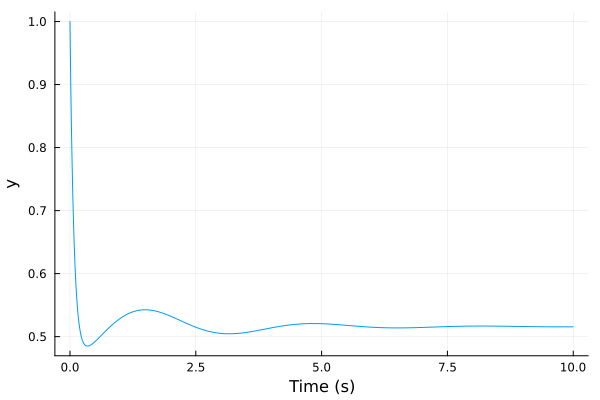

In [203]:
#there is a natural pole-zero near-cancellations. it is in the right half plane,
#but its time constant is extremely slow. since they are natural (not achieved
#through compensation), we can probably simplify them. they likely represent
#nearly uncontrollable states, because the pole is insensitive to feedforward
#compensation. this pole-zero pair disappears when v_y is omitted from the
#lateral dynamics, so it may represent the intuitive notion that v_y is not
#really controllable in a conventional aircraft! it is not mathematical, exact
#uncontrollability (which would result in exact pole-zero cancellation), but
#practical uncontrollability
a2p = minreal(roll_dyn_tf, 1e-2) 
@show zpk(a2p)

#output error transfer function for a unit feedback closed loop
err_a2p = 1/(1+a2p)
@show zpk(err_a2p)
#steady state error of the closed loop system for a unit step input
@show err_a2p(0)
step(err_a2p, 10) |> plot


zpk(err_c_a2p) = 

TransferFunction{Continuous, ControlSystemsBase.SisoZpk{Float64, ComplexF64}}
             (1.0s + 19.99999999999997)(1.0s + 5.83292605788593)(1.0s^2 + 1.0562999383628444s + 4.28694072260891)(1.0s)
1.0-------------------------------------------------------------------------------------------------------------------------------
   (1.0s + 29.08052753008387)(1.0s^2 + 7.166012959021332s + 48.178830252188206)(1.0s^2 + 0.9876611010311418s + 3.3491927211149526)

Continuous-time transfer function model


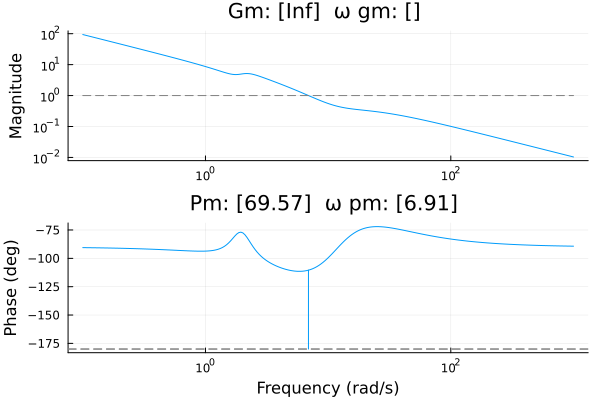

In [247]:

#this

k_p = 0.5
k_i = 10
k_d = 0.05
τ_d = 0.05
c = k_p + k_i * tf(1, [1,0]) + k_d * tf([1, 0], [τ_d, 1])
    
c_a2p = series(c, a2p)
err_c_a2p = 1/(1+c_a2p)
@show zpk(err_c_a2p);
marginplot(c_a2p)
# nyquistplot(c_a2p)

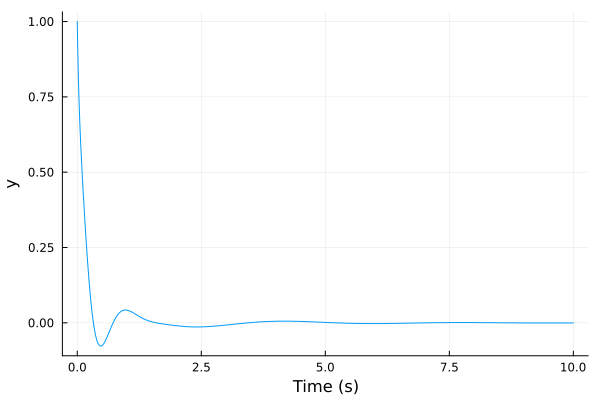

In [248]:
step(err_c_a2p, 10) |> plot

### Turn Coordination

First we focus on turn coordination. the plan is to design a SISO turn coordinator, ignoring the roll - yaw coupling for the moment. the result will be a SISO compensator with β_err as input and u_r as output. we embed it in a MIMO compensator that applies the SISO compensator to β_err and lets u_a pass through unchanged, and connect it upstream of the lateral dynamics plant. the result is then a plant with β_dmd and u_a as inputs.

From this updated plant, in a second step, we design a SISO roll rate controller with p_err as input and u_a as output. we embed it in a MIMO compensator that has p_err and β_dmd as inputs and u_a and β_dmd as outputs. of course, since roll and yaw are coupled, adding this second controller will alter the β to u_r response that resulted from the previous design, so we will have to check whether it is still satisfactory. if not, further iterations might be required.

Once the sequential design is done, we can encapsulate both SISO controllers in a single MIMO controller with a decoupled internal structure.

Maybe start with roll control. Because it looks like we can't deal with the unstable pole with a rudder input

In [200]:
yaw_dyn = filter(lat_dyn;
    u = (:rudder,),
    y = (:β,))

yaw_dyn_ss = yaw_dyn |> ss
yaw_dyn_tf = yaw_dyn_ss |> tf
@show zpk(yaw_dyn_tf)

zpk(yaw_dyn_tf) = TransferFunction{Continuous, ControlSystemsBase.SisoZpk{Float64, ComplexF64}}
                               (1.0s + 25.098993684235204)(1.0s + 20.000000000020258)(1.0s + 6.3269732913898595)(1.0s - 0.08784552994724167)
-0.02845961649456541------------------------------------------------------------------------------------------------------------------------------------
                    (1.0s + 20.000000000000007)(1.0s + 5.832926057885931)(1.0s^2 + 1.0562999383628426s + 4.286940722608907)(1.0s - 0.023250840116250216)

Continuous-time transfer function model


TransferFunction{Continuous, ControlSystemsBase.SisoZpk{Float64, ComplexF64}}
                               (1.0s + 25.098993684235204)(1.0s + 20.000000000020258)(1.0s + 6.3269732913898595)(1.0s - 0.08784552994724167)
-0.02845961649456541------------------------------------------------------------------------------------------------------------------------------------
                    (1.0s + 20.000000000000007)(1.0s + 5.832926057885931)(1.0s^2 + 1.0562999383628426s + 4.286940722608907)(1.0s - 0.023250840116250216)

Continuous-time transfer function model

zpk(r2β) = TransferFunction{Continuous, ControlSystemsBase.SisoZpk{Float64, ComplexF64}}
                               (1.0s + 25.098993684235204)(1.0s + 6.3269732913898595)
-0.02845961649456541----------------------------------------------------------------------------
                    (1.0s + 5.832926057885919)(1.0s^2 + 1.0562999383628426s + 4.286940722608907)

Continuous-time transfer function model
zpk(c1_r2β) = TransferFunction{Continuous, ControlSystemsBase.SisoZpk{Float64, ComplexF64}}
                              (1.0s + 25.098993684235204)(1.0s + 6.3269732913898595)
0.02845961649456541----------------------------------------------------------------------------
                   (1.0s + 5.832926057885919)(1.0s^2 + 1.0562999383628426s + 4.286940722608907)

Continuous-time transfer function model
err_c1_r2β(0) = [0.8469285555171844;;]


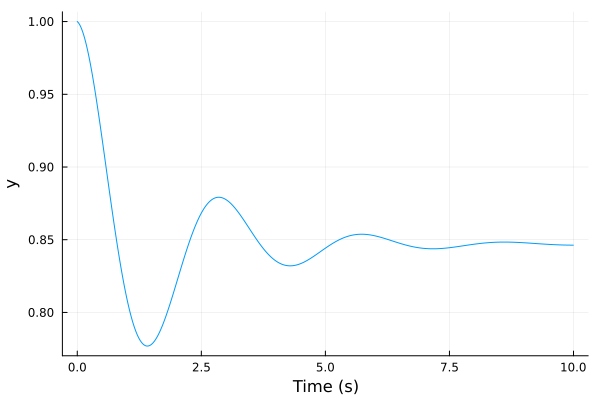

In [211]:
#get rid of natural zero-pole near-cancellation
r2β = minreal(yaw_dyn_tf, 1e-1)
@show zpk(r2β)

#the first thing we notice is that the DC gain is negative. this makes sense,
#given that we have: act.rudder↑ -> aero.r↓ -> yaw↑ -> β↓. therefore, the first
#thing we need in the forward path is a sign change.
c1 = tf(-1)
c1_r2β = series(c1, r2β)
@show zpk(c1_r2β)

#output error transfer function for a unit feedback closed loop
err_c1_r2β = 1/(1+c1_r2β)
# @show zpk(err_c1_r2β)
@show err_c1_r2β(0)
step(err_c1_r2β, 10) |> plot


err_c2_c1_r2β(0) = [0.0;;]


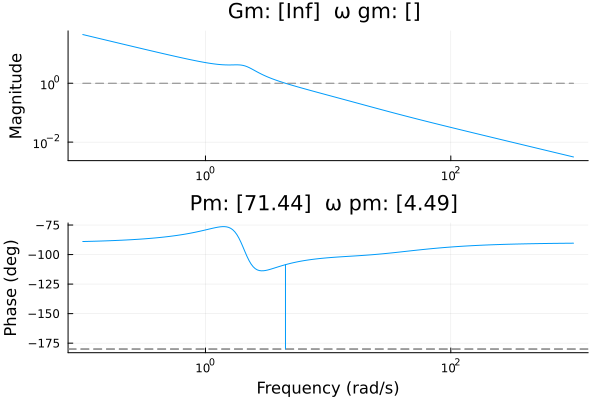

In [212]:
#type 0 system, needs an integrator in the feedforward path
k_p = 10
k_i = 25
k_d = 5
τ_d = 0.05
c2 = k_p + k_i * tf(1, [1,0]) + k_d * tf([1, 0], [τ_d, 1])
    
c2_c1_r2β = series(c2, c1_r2β)

err_c2_c1_r2β = 1/(1+c2_c1_r2β)
# @show zpk(err_c2_c1_r2β)
@show err_c2_c1_r2β(0)

marginplot(c2_c1_r2β)

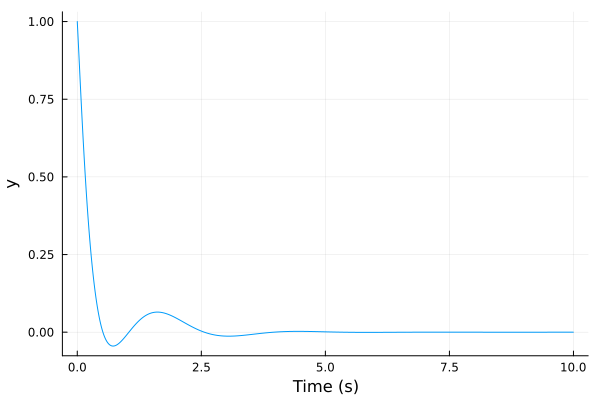

In [213]:

step(err_c2_c1_r2β, 10) |> plot